# LSDS 142 Assignment

## Intermediate Linear Algebra

---
---

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## Statistics

---

### 1.1 

Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. 

Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
# Create list of sales figures
sales_last_week = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
df_sales = pd.DataFrame(sales_last_week, columns=["sales"])  # pandas dataframe to check work

df_sales

,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [3]:
# Calculate the mean
mean_sales = sum(sales_last_week) / len(sales_last_week)
mean_sales_pd = df_sales["sales"].mean()

print(mean_sales)
print(mean_sales_pd)

assert mean_sales == mean_sales_pd

3052.714285714286
3052.714285714286


In [4]:
# Calculate the variance

# Create function that calculates variance of a list
def variance(sample):
    """Returns the sample variance of a list of numerical observations."""
    m = sum(sample) / len(sample)
    return sum([(x - m) ** 2 for x in sample]) / (len(sample) - 1)

In [5]:
# Use the function to calculate the variance of last week's sales
sales_var = variance(sales_last_week)
sales_var_pd = df_sales["sales"].var()

print(sales_var)
print(sales_var_pd)

assert sales_var == sales_var_pd

214387.90476190473
214387.90476190473


In [6]:
# Calculate standard deviation

# Write function to calculate stdev
def stdev(pop):
    """Returns the standard deviation of a list of numerical observations
    that represents a population."""
    return variance(pop) ** 0.5 # Stdev is the square root of variance

In [7]:
# Use it to calculate the stdev of last week's sales
sales_stdev = stdev(sales_last_week)
sales_stdev_pd = df_sales["sales"].std()

print(sales_stdev)
print(sales_stdev_pd)

assert sales_stdev == sales_stdev_pd

463.0204150595357
463.0204150595357


---

### 1.2 

Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] 

(you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [8]:
# Define cust_last_week as python list
cust_last_week = [127, 80, 105, 92, 120, 115, 93]
df_sales["cust"] = cust_last_week

df_sales

,sales,cust
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [9]:
# Calculate covariance using pandas
cov_last_week = df_sales.cov()
cov_last_week

,sales,cust
sales,214387.904762,7604.357143
cust,7604.357143,290.952381


In [10]:
# The covariance is the two numbers on either side of the main diagonal
# of the variance covariance matrix
cov_last_week = np.cov(sales_last_week, cust_last_week)[0][1]  # Grab the first row, second column
cov_last_week

7604.357142857142

---

### 1.3 

Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [11]:
# Calculate stdev for cust_last_week
cust_stdev = stdev(df_sales["cust"])
cust_stdev_pd = df_sales["cust"].std()

print(cust_stdev)
print(cust_stdev_pd)

17.057326313123664
17.057326313123664


In [12]:
# Look at the two stdevs
print(sales_stdev)
print(cust_stdev)

# Confirm my calculations by comparing to np.std
assert round(sales_stdev, 4) == round(sales_stdev_pd, 4)
assert round(cust_stdev, 4) == round(cust_stdev_pd, 4)

463.0204150595357
17.057326313123664


In [13]:
# Finding the correlation coefficient
corr_coeff = cov_last_week / (sales_stdev * cust_stdev)
corr_coeff

0.9628339778148909

In [14]:
# Checking against numpy correlation coefficient
corr_coeff_pd = df_sales.corr()
corr_coeff_pd.iloc[0][1]

0.9628339778148908

In [15]:
# Testing my work
assert round(corr_coeff, 4) == round(corr_coeff_pd.iloc[0][1], 4)

---

### 1.4 

Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

 Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. 
 
 *(you can encode some of the categorical variables and include them as a stretch goal if you finish early)*

In [16]:
# Read the csv into a dataframe
titanic_data_url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
df = pd.read_csv(titanic_data_url, index_col=0)  # Using the first column as the index

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [17]:
# Find out which columns are numerical
print(df.dtypes)

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object


In [18]:
# I guess I don't need to do that - only uses the numerical columns by default (obviously...)

# Calculate the variance covariance matrix
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [19]:
# Calculate the correlation matrix
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


---
---

# Orthogonality

---

### 2.1

Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

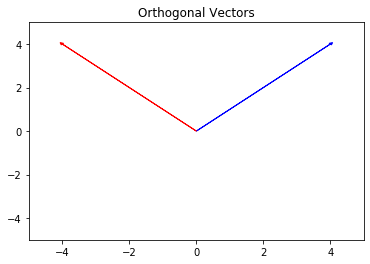

In [20]:
# Two vectors are orthogonal if their dot product is 0
ortho_vectors = {
    "b": [4, 4],
    "r": [-4, 4],
}
    
for v in ortho_vectors:
    plt.arrow(0, 0, ortho_vectors[v][0], ortho_vectors[v][1], head_width=0.1, head_length=.1, color=v)
    
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title("Orthogonal Vectors")
plt.show()

A synonym of orthogonal is perpindicular. That makes it easy to understand that vectors or matrices that are orthogonal are at right angles to one another.

---

### 2.2

Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [21]:
# To find out, I'll check to see if their dot product is zero
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

print((a * b).sum())
print(np.dot(a, b))  # Using both methods to be sure of the calculation

-40
-40


The vectors $a$ and $b$ are not orthogonal because their dot product is $-40$ (not $0$).

---

### 2.3

Compute the following values: What do these quantities have in common?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [22]:
# Define the vector as numpy array
c = np.array([[2], [-15], [6], [20],])

print(c)

[[  2]
 [-15]
 [  6]
 [ 20]]


1. What is $||c||^2$? 

In [23]:
# Calculate the norm
c_norm = np.linalg.norm(c)
print(c_norm ** 2)

665.0


2. What is $c \cdot c$? 

In [24]:
# Calculate the dot product of c and itself
(c * c).sum()

665

3. What is $c^{T}c$?

In [32]:
# Multiply c transpose with c
print(np.multiply(c.T, c))

[[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


In [33]:
# Not sure the difference of this yet, but will do more research as time allows
print(c.T @ c)

[[665]]


---
---

# Unit Vectors

---

### 3.1

Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

---

### 3.2

Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [27]:
# Define f as a numpy array
f = np.array([[4], [12], [11], [9], [2]])

print(f)

[[ 4]
 [12]
 [11]
 [ 9]
 [ 2]]


In [28]:
# Calculate the norm
f_norm = np.linalg.norm(f)
f_norm

19.131126469708992

In [30]:
# Divide the original vector by the norm to get the unit vector
f_hat = f / f_norm
f_hat

array([[0.20908335],
       [0.62725005],
       [0.57497921],
       [0.47043754],
       [0.10454167]])

---
---

# Linear Independence / Dependence 

### 4.1

Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

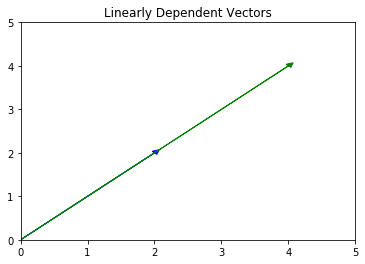

In [37]:
# Linearly Dependent Vectors

# Define viewable axis
plt.xlim(0, 5)
plt.ylim(0, 5)

# Define vectors
v1 = [2, 2]
v2 = [4, 4]

plt.arrow(0, 0, v1[0], v1[1], head_width=0.1, head_length=0.1, color="b")
plt.arrow(0, 0, v2[0], v2[1], head_width=0.1, head_length=0.1, color="g")

plt.title("Linearly Dependent Vectors")
plt.show()

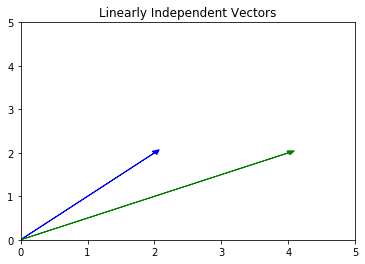

In [39]:
# Linearly Independent Vectors

# Define viewable axis
plt.xlim(0, 5)
plt.ylim(0, 5)

# Define vectors
v1 = [2, 2]
v2 = [4, 2]

plt.arrow(0, 0, v1[0], v1[1], head_width=0.1, head_length=0.1, color="b")
plt.arrow(0, 0, v2[0], v2[1], head_width=0.1, head_length=0.1, color="g")

plt.title("Linearly Independent Vectors")
plt.show()

---

# Span

---

### 5.1

What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

---

### 5.2

What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

---

# Basis

---

### 6.1

Graph two vectors that form a basis for $\mathbb{R}^2$

---

### 6.2

What does it mean to form a basis?

---
---

# Rank

---

### 7.1

What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

---

### 7.2

What does the rank of a matrix tell us?

---

# Linear Projections

---

### 8.1 

Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 

\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

#### Find $proj_{L}(w)$

#### Graph your projected vector to check your work (make sure your axis are square/even)

---
---

# Stretch Goal

- For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)
- Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 
- For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

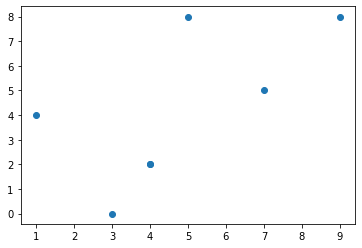

In [22]:
# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()